# Data Handeling
#### Dataset is been stored in a single directory with specific directory classes which will be:
    1.Adenocarcinoma
    2.Large Cell Carcinoma
    3.Normal
    4.Squamous Cell Carcinoma
   
#### Sub division of all these directory into Train, Test and Validation with 70%, 20% and 10% respectively.
    1.Train -> adenocarcinoma, large cell carcinoma, normal and squamous cell carcinoma (70%)
    2.Test -> adenocarcinoma, large cell carcinoma, normal and squamous cell carcinoma (20%)
    3.Val -> adenocarcinoma, large cell carcinoma, normal and squamous cell carcinoma (10%)


In [3]:
import os
#setup a path for directory to save and handle these dataset.
main_directory="C:/Users/david/Internship/Image Preprocessing/Dataset/"
# creating a list variable.
no_of_folder = {}
#looping to open each directory and counting the number of files in each directory.
for folders in os.listdir(main_directory):
    no_of_folder[folders]=len(os.listdir(os.path.join(main_directory,folders)))
no_of_folder.items()

dict_items([('adenocarcinoma', 326), ('large.cell.carcinoma', 163), ('normal', 159), ('squamous.cell.carcinoma', 252)])

#### Dividing the dataset into train, test and validation
    Step 1: Create 3 directories
    Step 2: Divide dataset and store it into 3 directories

In [19]:
#folder creation
import numpy as np
import math
import shutil # To work with copy operations on directories
if not os.path.exists("./train"):# Loop to check if directory exist
    os.mkdir("./train")# Creating directory
    for folder in os.listdir(main_directory):# Loop to create directories of 4 classes of the dataset
        os.makedirs("./train/"+folder)# Creating 4 directories
        
        # Loop to divide the dataset into 3 classes (train,test and validation)
        # Loop to store 70% of the data into train directory of each class
        for img in np.random.choice(a=os.listdir(os.path.join(main_directory,folder)),
                                   size=(math.floor(70/100*no_of_folder[folder])-5),replace=False):
            origin=os.path.join(main_directory,folder,img) # Selecting which dataset to divide into 70%
            destination=os.path.join("./train",folder)# selecting the path to store these divided dataset
            shutil.copy(origin,destination)# code to copy these images from one directory to another
            os.remove(origin)# deleting the old directory after copying
else:
    print("The folder your trying to create already exist")            

#### Creating function to reduce runtime delay and lines of code

In [22]:
def divide_data(p,split):
    if not os.path.exists("./"+p):# Loop to check if directory exist
        os.mkdir("./"+p)# Creating directory
        for folder in os.listdir(main_directory):# Loop to create directories of 4 classes of the dataset
            os.makedirs("./"+p+"/"+folder)# Creating 4 directories
        
        # Loop to divide the dataset into 3 classes (train,test and validation)
        # Loop to store 70% of the data into train directory of each class
            for img in np.random.choice(a=os.listdir(os.path.join(main_directory,folder)),
                                   size=(math.floor(split*no_of_folder[folder])-5),replace=False):
                origin=os.path.join(main_directory,folder,img) # Selecting which dataset to divide into 70%
                destination=os.path.join("./"+p,folder)# selecting the path to store these divided dataset
                shutil.copy(origin,destination)# code to copy these images from one directory to another
                os.remove(origin)# deleting the old directory after copying
    else:
        print("The folder your trying to create already exist") 
    

In [23]:
divide_data("test",0.20)

In [24]:
divide_data("val",0.10)

## Image Preprocessing
Since the dataset is of CT-Scan and it comes in a black and white format hence there is no need of image tranformation.

### Scenario 1. 
1st stage of model building where model is trained with cleaner data or more visible data
#### Image Morphology (Opening)
Opening -> Erosion + Dilation

#### Preprocessing on single image 

Text(0.5, 1.0, 'Preprocessed Image')

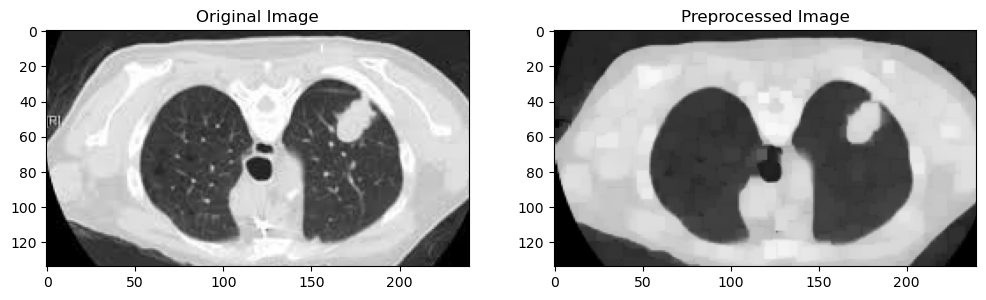

In [33]:
import numpy as np
import matplotlib.pyplot as plt # To display image in a axis
from skimage.io import imread, imshow # To retrieve and display images 
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening) # To perform image morphology preprocessing

leaves = imread('C:/Users/david/Internship/Image Preprocessing/train/adenocarcinoma/ad4.png') # To read image and save in a variable
fig, ax = plt.subplots(1,2, figsize=(12,6)) # Creating axis skeleton space to display image
ax[0].imshow(leaves); # Display original image
ax[0].set_title('Original Image')# Assigning a title to the original image
scale_percent = 100
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height) # Math to setup image size to fit the plot

image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) # Compiling the image resize
kernel = np.ones((6,6), dtype = "uint8")/9 #setup Kernal properties
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel) # Apply morphology to the image
ax[1].imshow(opening)# Displaying preprocessed image
ax[1].set_title('Preprocessed Image')#Assigning a title to the original image

#### Preprocessing on multiple images and saving in a different folder

In [42]:
import numpy as np
import cv2
import os

img = "C:/Users/david/Internship/Image Preprocessing/train/adenocarcinoma/" # Origin image path

dir_list = os.listdir(img) # Create variable which stored all files present in the directory

for i in range(len(dir_list)): # loop the variable

    pre_img=cv2.imread(img+dir_list[i]) # Create individual path variable of each image file
    scale_percent = 70
    width = int(pre_img.shape[1] * scale_percent / 100)
    height = int(pre_img.shape[0] * scale_percent / 100)
    dim = (width, height) # Math to setup image size to fit the plot

    image = cv2.resize(pre_img, dim, interpolation = cv2.INTER_AREA) # Compiling the image resize
    kernel = np.ones((6,6), dtype = "uint8")/9 ##setup Kernal properties
    opening = cv2.morphologyEx(pre_img, cv2.MORPH_OPEN, kernel)# Apply morphology to the image
    cv2.imwrite('C:/Users/david/Internship/Image Preprocessing/train/ad_preprocessed_images/pros_img'+dir_list[i],opening) #Save Preprocessed image in a new folder

### Scenario 2.
If tranied model gives results which is due to underfitting or is the model is baised on specific class.

#### Image Augmentation (Shift, Flip and Rotation)

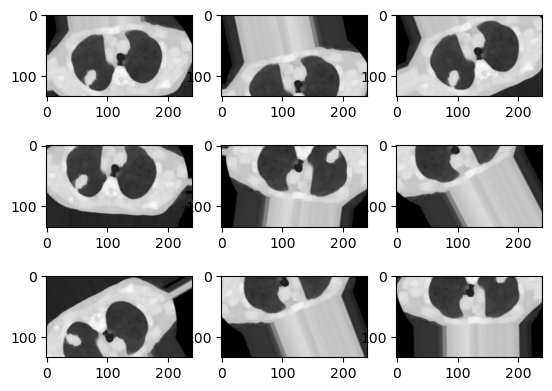

In [61]:
# example of horizontal shift image augmentation and Flip
from numpy import expand_dims
from tensorflow.keras.utils import load_img,img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('C:/Users/david/Internship/Image Preprocessing/train/ad_preprocessed_images/pros_imgad4.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[10,50],horizontal_flip=True, vertical_flip=True,rotation_range=30, fill_mode='nearest')
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
# define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure from 1 - 100 1 to 100
pyplot.show()

In [ ]:
web scrapping stratergy...gather more data......